# 线性回归

## 符号描述
假设有训练数据集$D= \left \{(x_1, y_1), (x_2, y_2), \cdots, (x_m, y_m) \right \}$
其中第$i^{th}$个样本$x_i$有n个特征，它的特征向量为n维列向量。
$$
{x}_i = \begin{pmatrix}
x_{i,1} \\
x_{i,2} \\
{\vdots} \\
x_{i,n} 
\end{pmatrix}
$$

则m个输入样本，输入矩阵为$m \times n$维的矩阵。
$$
X = \begin{pmatrix}
(x_1)^T \\
(x_2)^T \\
{\vdots} \\
(x_m)^T 
\end{pmatrix}
= \begin{pmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m,1} & x_{m,2} & \cdots & x_{m,n}
\end{pmatrix}
$$
m个输出向量为：
$$
y = \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{pmatrix}
$$

线性回归就是寻求自变量与因变量之间的线性关系，假设函数为：
$$
h_{\theta}(x_i) = \theta_0 + \theta_1x_{i,1} + \theta_2x_{i,2} + \cdots + \theta_nx_{i,n}
$$

其中，$\theta$写成向量形式如：
$$
\theta = \begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{pmatrix}
$$
给向量$x_i$加上元素$x_{i,0} = 1$，则假设函数可以用向量表示为：
$$h_{\theta}(x_i) = \theta^Tx_i$$
全部m个样本输入到$h_{\theta}$中为：
$$h_{\theta}(X) = X\theta$$

其中X为：
$$
X
= \begin{pmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m,1} & x_{m,2} & \cdots & x_{m,n}
\end{pmatrix}
$$

## 建立模型

假设第$i^{th}$个样本经过假设函数输出为：
$$
\hat{y_i} = h_{\theta}(x_i)
$$
线性回归试图学到一个$h_{\theta}$使得$\hat{y_i} \approx y_i$。也就是说使得模型的输出尽可能接近真实值。

整个训练集输入到假设函数里面有
$$
\hat{y} = h_{\theta}(X) = X\theta
$$

为衡量假设输出与真实输出的误差，需要定义一个损失函数$loss(\hat{y_i}, y_i)$，它度量了假设输出与真实值之间的损失，这个函数的结果越小表示越接近。
通常在回归模型中，常用均方误差作为损失的度量。
$$
loss(\hat{y_i}, y_i) = \left ( \hat{y_i} - y_i\right)^2 = \left ( h_{\theta}(x_i) - y_i\right)^2 
$$

整个训练集上的损失常用代价函数描述，它是关于$\theta$的函数：
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m loss\left(\hat{y_i}, y_i \right) = \frac{1}{2m} \sum_{i=1}^m \left(\theta^Tx_i - y_i \right)^2
$$

线性模型的目标为求得一组$\theta$使得$J(\theta)$最小，用数学语言描述为：
$$\theta^* = \underset{\theta}{arg min} J(\theta)$$

## 优化
上面建立了数学模型，接下来就要想办法求得以上模型中参数的最优解。
###  梯度下降法
为什么认为$J(\theta)$可以用梯度下降法求得全局最优解？
因为该函数为凸函数，凸函数可以收敛到全局最优。

为什么认为$J(\theta)$为凸函数？
将其展开。
$$
J(\theta_0, \theta_1, \cdots, \theta_n) = \frac{1}{2m} \sum_{i=1}^m\left(\theta_0x_{i,0} + \theta_1x_{i,1} + \theta_nx_{i,n} - y_i\right)^2
$$

观察上式，$J(\theta_i)$在固定其他$\theta$时它是一个关于$\theta_i$的二次函数。

举个例子。

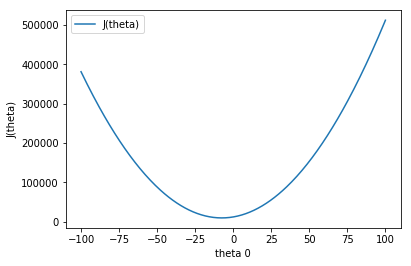

In [3]:
# 以波士顿房价数据集作为例子
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

X,y = datasets.load_boston(return_X_y=True)
m, n = X.shape

theta = np.random.rand(n,1)

def compute_cost(theta, X, y):
    '''
    theta: n * 1
    X: m * n
    y: m * 1
    '''
    r = np.dot(X, theta) - y
    result = np.dot(r.T, r) / (2*m)
    return result[0][0]

y = y.reshape(-1, 1)
# x = np.linspace(0,10,100)
x_range = np.linspace(-100,100,300)
y_range = []
for x in x_range:
    theta[0] = x
    y_range.append(compute_cost(theta, X, y))

y_range = np.array(y_range)
plt.plot(x_range, y_range, label="J(theta)")
plt.xlabel("theta 0")
plt.ylabel("J(theta)")
plt.legend() 
plt.show()


上面的图中为固定其他$\theta$,只变化$\theta_0$时的$J(\theta_0)$结果，明显可以看出它是典型的二次函数，有全局最小值。


求梯度
$$
\frac{\partial J(\theta)}{\partial \theta_k} = \frac{1}{m} \sum_{i=1}^m (\theta^T x_i -y_i) x_{i,k}
$$

写成向量形式为：
$$
\frac{\partial J(\theta)}{\partial \theta} = X^T(X\theta -y)
$$

因此，每次迭代更新$\theta$的公式为：
$$
\theta = \theta - \alpha( \frac{\partial J(\theta)}{\partial \theta} = \theta - \alpha  X^T(X\theta -y)
$$

In [5]:
# 使用代码实现梯度下降的优化
class LR:
    def __init__(self, X, y):
        self.m = X.shape[0] # 样本数量
        self.n = X.shape[1] + 1 # 特征数目
        self.X = np.insert(X, 0, values=np.ones(self.m), axis=1)
        self.y = y.reshape((-1, 1))
        self.theta = np.random.rand(self.n,1)
        self.learning_rate = 0.00000001
        self.num_iter = 1000000
    
    def compute_cost(self, theta):
        '''
        theta: n * 1
        X: m * n
        y: m * 1
        '''
        X = self.X
        y = self.y
        r = np.dot(X, theta) - y
        result = np.dot(r.T, r) / (2*m)
        return result[0][0]
    
    def compute_grad(self, theta, X, y):
        '''
        theta: n * 1
        X: m * n
        y: m * 1
        '''
        res = np.dot(X, theta) - y
        result = np.dot(X.T, res)
        return result

    def optimizer(self):
        X = self.X
        y = self.y
        theta = self.theta
        learning_rate = self.learning_rate
        num_iter = self.num_iter
        
        
        for i in range(num_iter):
            grad = self.compute_grad(theta, X, y)
            theta = theta - learning_rate * grad
        return theta

lr = LR(X, y)

theta = lr.optimizer()
lr.compute_cost(theta)
theta

12.117708625795636

array([[ 1.17329608e+00],
       [-9.44459985e-02],
       [ 5.19092062e-02],
       [-1.17399984e-02],
       [ 1.35490982e+00],
       [ 3.86077094e-01],
       [ 5.53637660e+00],
       [-5.19183014e-03],
       [-9.31707081e-01],
       [ 1.84870759e-01],
       [-1.07015831e-02],
       [-3.82034080e-01],
       [ 1.50964658e-02],
       [-4.55451146e-01]])

### 矩阵求导法求最优解
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\theta^Tx_i - y_i \right)^2
$$

写成矩阵形式
$$
J(\theta) = \frac{1}{2m}(X\theta -y)^T(X\theta -y)
$$

目标函数为连续函数，目标函数取得最小值时$\theta$一定为目标函数驻点，它的梯度在最优值处一定为0。
将$J(\theta)$展开，前面的系数为常数，对结果无任何影响可以省略掉。
$$
J(\theta) = (X\theta -y)^T(X\theta - y) = \theta^TX^TX\theta - y^TX\theta - \theta^TX^Ty + y^Ty
$$

上式中，其中$ y^TX\theta$ 和 $\theta^TX^Ty $都是标量，他们的值应该是相等的，为了后面求导方便，统一写成$\theta^TX^Ty$，于是.
$$
J(\theta) = \theta^TX^TX\theta - 2\theta^TX^Ty + y^Ty
$$

运用矩阵求导公式得到：
$$
\frac{\partial J(\theta)}{\partial \theta} = X^TX\theta + (X^TX)^T\theta - 2X^Ty = 2X^TX\theta - 2X^Ty
$$

令梯度等于0
$$
\frac{\partial J(\theta)}{\partial \theta} = 0 \Rightarrow X^TX\theta - X^Ty = 0 \\ 
\Rightarrow  X^TX\theta = X^Ty
$$

$X^TX$为$m \times m$的方阵，如果$X^TX$是可逆的，可以通过两边同时左乘以$(X^TX)^{-1}$来求得$\theta$，即。
$$
\theta = (X^TX)^{-1}X^Ty
$$

In [6]:
#代码实现

class LR2:
    def __init__(self, X, y):
        self.m = X.shape[0] # 样本数量
        self.n = X.shape[1] + 1 # 特征数目
        self.X = np.insert(X, 0, values=np.ones(self.m), axis=1)
        self.y = y.reshape((-1, 1))
        
    def normal_equation(self):
        X = self.X
        y = self.y
        theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        return theta
    
    def compute_cost(self, theta):
        '''
        theta: n * 1
        X: m * n
        y: m * 1
        '''
        X = self.X
        y = self.y
        
        r = np.dot(X, theta) - y
        result = np.dot(r.T, r) / (2*m)
        return result[0][0]

    
lr = LR2(X, y)
theta = lr.normal_equation()
lr.compute_cost(theta)
theta

10.947415590864596

array([[ 3.64594884e+01],
       [-1.08011358e-01],
       [ 4.64204584e-02],
       [ 2.05586264e-02],
       [ 2.68673382e+00],
       [-1.77666112e+01],
       [ 3.80986521e+00],
       [ 6.92224640e-04],
       [-1.47556685e+00],
       [ 3.06049479e-01],
       [-1.23345939e-02],
       [-9.52747232e-01],
       [ 9.31168327e-03],
       [-5.24758378e-01]])

In [ ]:
# 与sklearn的结果比较

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.coef_
lr.intercept_


从上面代码运行的结果来看，用矩阵求导法求出来的最优解与sklearn求出来的一样，结果比用梯度下降要好。

## 概率上的意义
为什么在线性回归中选择均方误差作为损失函数是可行的，因为它有着概率上的意义。
### 中心极限定理

**当样本量N逐渐趋于无穷大时，N个抽样样本的均值的频数逐渐趋于正态分布**，其对原总体的分布不做任何要求，意味着无论总体是什么分布，其抽样样本的均值的频数的分布都随着抽样数的增多而趋于正态分布。


### 用极大似然估计解释最小二乘法
对于给定输入样本$x$, 我们得到预测值$\hat{y}$与真实值$y$之间存在误差$\epsilon$，即。
$$
y = \hat{y} + \epsilon
$$
对m个输入样本有m个$\epsilon$，它们是独立同分布的。
根据中心极限定理，由于误差项是好多好多相互独立的因素影响的综合影响，我们有理由假设其服从高斯分布，并且它们的均值为0，方差为某定值$\sigma$.
$$
\epsilon \sim N(0, \sigma^2)
$$

因此有
$$
(y-\widehat{y}) \sim N(0, \sigma^2) \\
=> y \sim N(\widehat{y}, \sigma^2) 
$$

其中
$$
\hat{y} = h_{\theta}(x) = \theta^Tx
$$

即
$$
P(y|x; \theta) = \frac{1}{\sqrt{2\pi \sigma^2}}exp(-\frac{(y-\theta^Tx)^2}{2\sigma^2})
$$



已知m个$y$服从正太分布，并且这m个$y$真实出现了，那么什么样的参数会使得这m个$y$出现的概率最大呢？这可以用极大似然估计来求解。似然函数为：
$$
L(\theta) = \prod_{i=1}^mP(y_i|x_i;\theta) = \prod_{i=1}^m \frac{1}{\sqrt{2\pi \sigma^2}}exp(-\frac{(y_i-\theta^Tx_i)^2}{2\sigma^2})
$$

两边取对数得：
$$
l(\theta) = logL(\theta) = \sum_{i=1}^mlog\left( \frac{1}{\sqrt{2\pi \sigma^2}}exp(-\frac{(y_i-\theta^Tx_i)^2}{2\sigma^2}) \right) \\
= \sum_{i=1}^m \left( log\frac{1}{\sqrt{2\pi \sigma^2}} + log exp(-\frac{(y_i-\theta^Tx_i)^2}{2\sigma^2})  \right) \\
= m log\frac{1}{\sqrt{2\pi \sigma^2}} - \sum_{i=1}^m \frac{(y_i-\theta^Tx_i)^2}{2\sigma^2}
$$

观察$l(\theta0$，式子中$\sigma$为定值，因此，要想最大化$l(\theta)$就是要使$\sum_{i=1}^m(y_i - \theta^Tx_i)^2$最小，这与我们最小二乘法中损失函数采用均方误差一致。

## 扩展
### 正则化
为什么要正则化？
为防止过拟合，结构风险最小化，在寻找最优解时同时考虑结构复杂度。

#### L2-norm Ridge回归
将L2-norm项加入到损失函数
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\theta^Tx_i - y_i \right)^2 + \lambda \sum_{j=1}^n \theta_j^2
$$


#### L1-norm Lasso回归
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\theta^Tx_i - y_i \right)^2 + \lambda \sum_{j=1}^n \left| \theta_j \right|
$$


### Ridge回归优化
#### 梯度下降

求梯度
$$
\frac{\partial J(\theta)}{\partial \theta_k} = \frac{1}{m} \sum_{i=1}^m (\theta^T x_i -y_i) x_{i,k} + 2\lambda \theta_k
$$

写成向量形式为：
$$
\frac{\partial J(\theta)}{\partial \theta} = X^T(X\theta -y)+\lambda \theta
$$

因此，每次迭代更新$\theta$的公式为：
$$
\theta = \theta - \alpha( \frac{\partial J(\theta)}{\partial \theta} = \theta - \alpha \left( X^T(X\theta -y) + \lambda \theta \right)
$$

In [15]:
# 使用代码实现ridge回归的梯度下降的优化
class Ridge:
    def __init__(self, X, y):
        self.m = X.shape[0] # 样本数量
        self.n = X.shape[1] + 1 # 特征数目
        self.X = np.insert(X, 0, values=np.ones(self.m), axis=1)
        self.y = y.reshape((-1, 1))
        self.theta = np.random.rand(self.n,1)
        self.learning_rate = 0.00000001
        self.num_iter = 1000000
        self.C = 0.1
    
    def compute_cost(self, theta):
        '''
        theta: n * 1
        X: m * n
        y: m * 1
        '''
        C = self.C
        X = self.X
        y = self.y
        r = np.dot(X, theta) - y
        result = np.dot(r.T, r) / (2*m) + C*np.dot(theta.T, theta)
        return result[0][0]
    
    def compute_grad(self, theta):
        '''
        theta: n * 1
        X: m * n
        y: m * 1
        '''
        C = self.C
        X = self.X
        y = self.y
        res = np.dot(X, theta) - y
        result = np.dot(X.T, res) + C*theta
        return result

    def optimizer(self):
        X = self.X
        y = self.y
        theta = self.theta
        learning_rate = self.learning_rate
        num_iter = self.num_iter
        
        for i in range(num_iter):
            grad = self.compute_grad(theta)
            theta = theta - learning_rate * grad
        return theta

ridge = Ridge(X, y)

theta = ridge.optimizer()
ridge.compute_cost(theta)
theta

15.606242648410118

array([[ 8.12274451e-01],
       [-9.47182948e-02],
       [ 5.19507497e-02],
       [-9.55587425e-03],
       [ 1.19792717e+00],
       [ 3.04648464e-01],
       [ 5.57771418e+00],
       [-5.00159751e-03],
       [-9.31086026e-01],
       [ 1.84675966e-01],
       [-1.07093718e-02],
       [-3.78812683e-01],
       [ 1.51969895e-02],
       [-4.53331356e-01]])

#### 矩阵求导法

将Ridge回归的代价函数$J(\theta)$写成矩阵形式。
$$
J(\theta) = \frac{1}{2m}(X\theta -y)^T(X\theta -y) + \lambda \theta^T\theta
$$

运用矩阵求导公式得到：
$$
\frac{\partial J(\theta)}{\partial \theta} = X^TX\theta + (X^TX)^T\theta - 2X^Ty + 2\lambda\theta = 2X^TX\theta - 2X^Ty +  2\lambda\theta 
$$

令梯度等于0求驻点
$$
\frac{\partial J(\theta)}{\partial \theta} = 0 \\
=> 2X^TX\theta - 2X^Ty + 2\lambda\theta = 0 \\
(X^TX+\lambda I)\theta = X^Ty
$$
其中$I$为单位矩阵，维度与$X^TX$相同的方阵。
通常加入 $\lambda I$的方阵是可逆的。
$$
\theta = (X^TX + \lambda I)^{-1}X^Ty
$$

In [ ]:
# 代码实现
class Ridge2:
    def __init__(self, X, y):
        self.m = X.shape[0] # 样本数量
        self.n = X.shape[1] + 1 # 特征数目
        self.X = np.insert(X, 0, values=np.ones(self.m), axis=1)
        self.y = y.reshape((-1, 1))
        self.C = 0.001
        
    def normal_equation(self):
        X = self.X
        y = self.y
        C = self.C
        
        theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+ C*np.eye(self.n) ), X.T), y)
        return theta
    
    def compute_cost(self, theta):
        '''
        theta: n * 1
        X: m * n
        y: m * 1
        '''
        C = self.C
        X = self.X
        y = self.y
        r = np.dot(X, theta) - y
        result = np.dot(r.T, r) / (2*m) + C*np.dot(theta.T, theta)
        return result[0][0]

    
ridge = Ridge2(X, y)
theta = ridge.normal_equation()
ridge.compute_cost(theta)
theta

### Lasso 回归优化
由于L_1范数用的是绝对值，导致LASSO的优化目标不是连续可导的，也就是说，最小二乘法，梯度下降法，牛顿法，拟牛顿法都不能用。

L_1正则化问题求解可采用近端梯度下降法（Proximal Gradient Descent，PGD）。


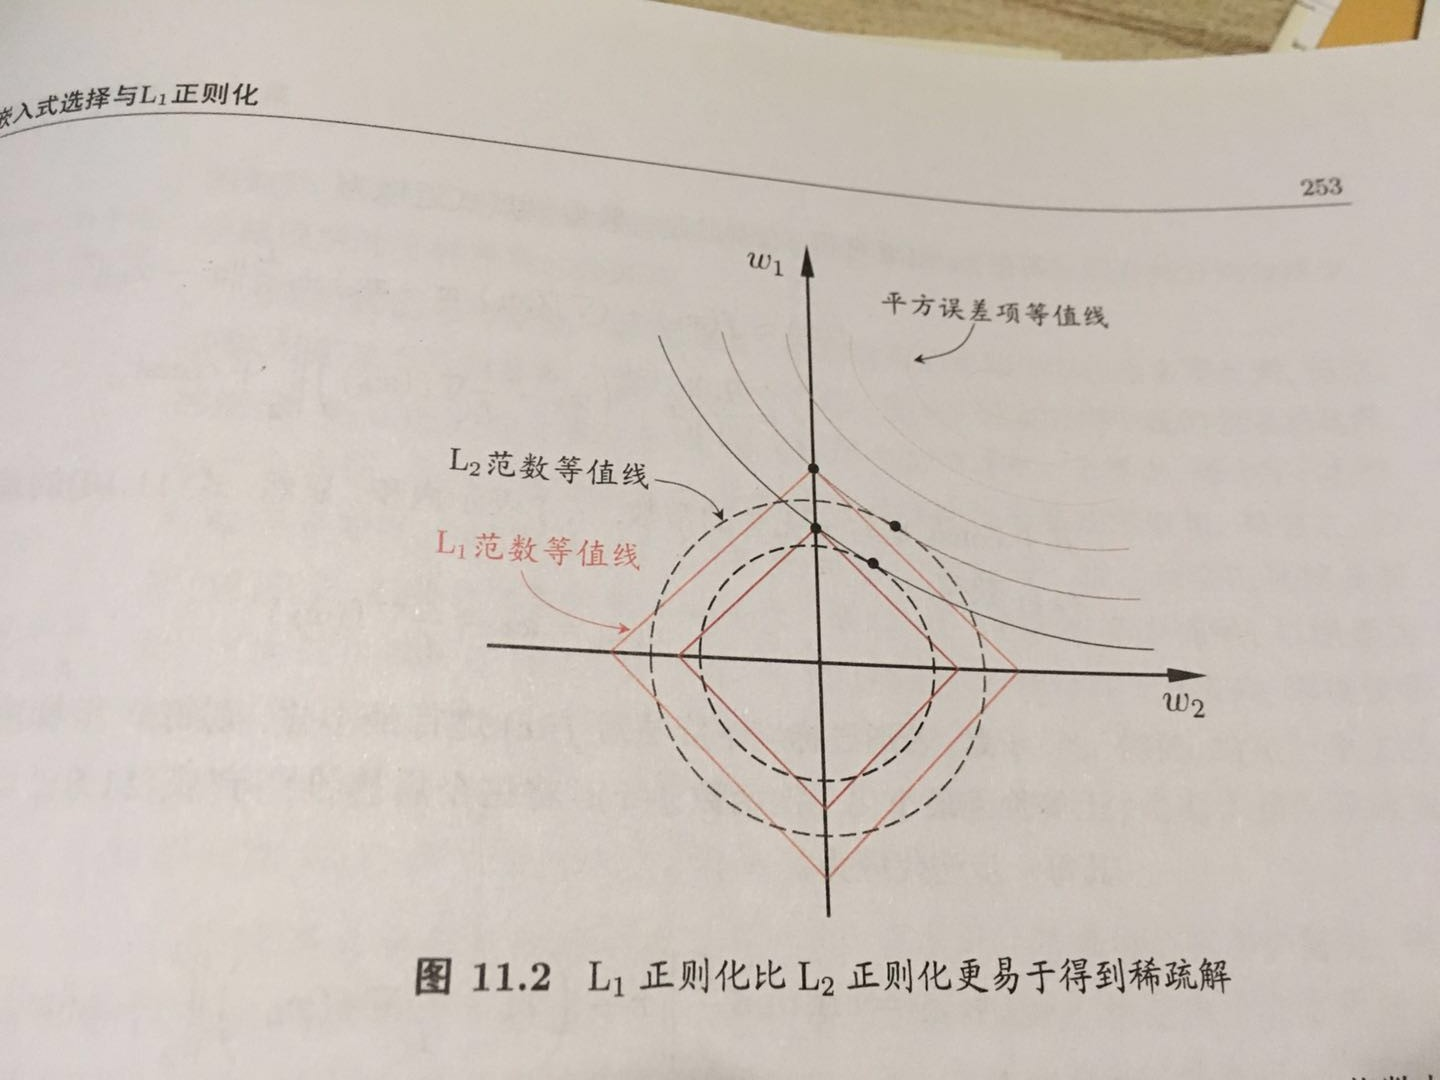

## 参考
https://blog.csdn.net/pxhdky/article/details/82960659